In [5]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels.stats as sms
import pylab 
import scipy.stats as stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from statsmodels.stats.diagnostic import linear_harvey_collier
###########################################################################################################################
#Se haran pequeños comentarios durante todas las celdas para justificar los pasos que lleve acabo para llegar al modelo final

In [6]:
df=pd.read_csv("UScrime.csv",sep=",",header=0)
df.head(2)
df.shape
#Leemos los datos 

(47, 12)

C:\Users\Luis_Romero\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


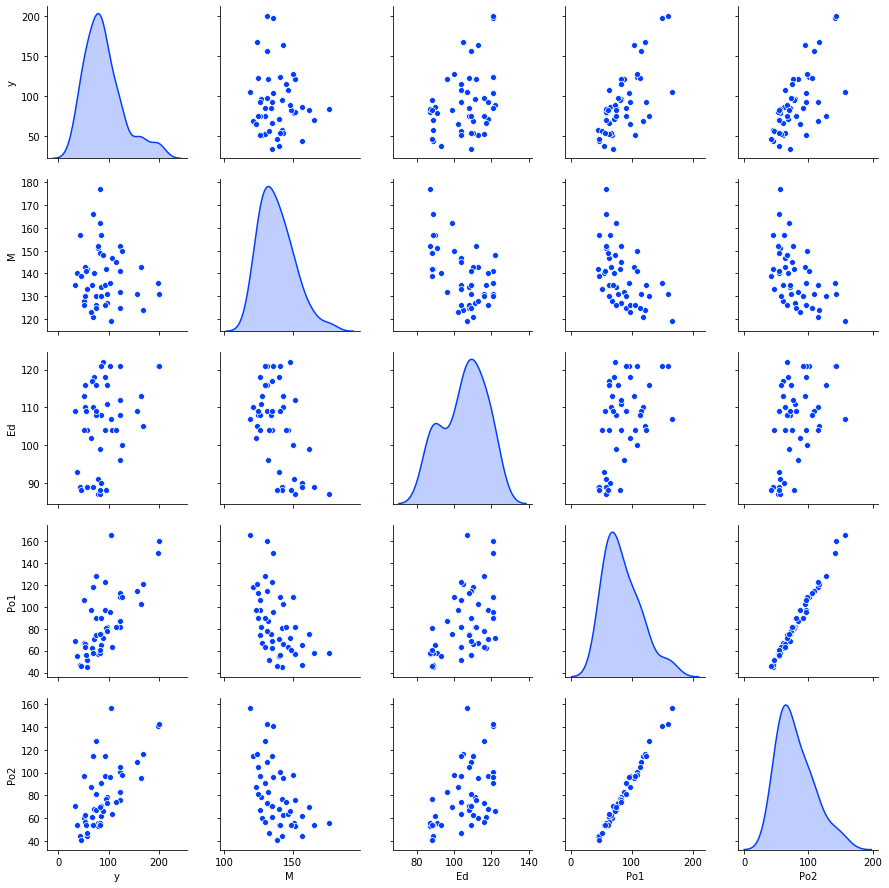

In [3]:
sns.set_palette("bright")
sns.pairplot(df.drop(columns=["So"]).iloc[:,:5],diag_kind = 'kde',size=2.5)
#Los visualizamos un poco 


In [7]:
x=df.iloc[:,1:12]
X=sm.add_constant(x)
y=df.iloc[:,0]
x.corr()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2
M,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843
So,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693
Ed,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682
Po1,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093
Po2,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224
LF,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762
M.F,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692
Pop,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422
NW,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908
U1,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925


In [9]:
model=sm.OLS(y,X).fit()
model.summary()
#Y de primeras ajustamos el modelos con todas las variables ,observamos que 
##Muchisimas variables no significativas, hay mucha correlación, BIC Y AIC de 445 y 467

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     6.907
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.96e-06
Time:                        23:33:57   Log-Likelihood:                -210.86
No. Observations:                  47   AIC:                             445.7
Df Residuals:                      35   BIC:                             467.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -596.7139    170.296     -3.504      0.001    -942.433    -250.995
M              1.0276      0.477      2.154      0.038       0.059       1.996
So            10.0301     15.814      0.634      0.530     -22.074      42.134
Ed             1.1354      0.677      1.676      0.103      -0.240       2.511
Po1            1.8055      1.199      1.506      0.141      -0.628       4.239
Po2           -1.0834      1.293     -0.838      0.408      -3.707       1.541
LF             0.0603      0.171      0.353      0.726      -0.286       0.406
M.F            0.3173      0.233      1.361      0.182      -0.156       0.790
Pop            0.0856      0.141      0.608      0.547      -0.200       0.371
NW             0.0341      0.069      0.495      0.624      -0.106       0.174
U1            -0.6801      0.493     -1.379      0.177      -1.681       0.321
U2             1.9881      0.953      2.086      0.044       0.053       3.923
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.096
Skew:                           0.515   Prob(JB):                        0.351
Kurtosis:                       3.098   Cond. No.                     5.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
##Aplicamos lo que yo recuerdo que es el paso Backward , es decir partimos de un modelo y quitamos variables hasta que obtengamos 
#quiza un buen modelo
model=sm.OLS(y,X).fit()
AIC=model.aic
MinAic=0
X_aux=X
Xm=[]
Var_Fuera=[]
w=list(X_aux.columns[1:])
#print(AIC)
while AIC>MinAic:
    AICs=[]
    BIC=[]
    errores=[]
    if MinAic!=0:
        AIC=MinAic
    else:
        pass
        
    for i in w:
        z=X_aux.drop([i],axis=1)
        #print(z)
        #print(y)
        model=sm.OLS(y,z).fit()
        #print(model.summary())
        yp=model.predict(z)
        errores.append(sum([(y[i]-yp[i])**2 for i in range(len(y))]))
        BIC.append(model.bic)
        AICs.append(model.aic)
        
    MinAic=min(AICs)
    min_ind=AICs.index(MinAic)
    
    Var_Fuera.append(w[min_ind])
    modelos= pd.DataFrame(np.array([AICs,BIC,errores]),columns=w)
    #print(modelos)
    if AIC>MinAic:
        w.pop(min_ind)

In [20]:
print((MinAic,w,AIC))
Mod_Back=X[["const",'M', 'So', 'Ed', 'Po1', 'Po2', 'M.F', 'Pop', 'U1', 'U2',"NW"]]
Model1=sm.OLS(y,Mod_Back).fit()
Model1.summary()
##Lo anterior nos arroja las siguientes variables pertenecientes al modelo 
##Cuatro variables no significativas , más variables (10), 
##Po1,Po2,M.F,Pop,U1,so,Ed,NW no son significativas ,hay mucha varianza entre las variables  
#puede que este no sea un buen modelo, intentemos con el paso forward


(444.05006426966696, ['M', 'So', 'Ed', 'Po1', 'Po2', 'M.F', 'Pop', 'NW', 'U1', 'U2'], 443.8897424919773)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     7.775
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.79e-06
Time:                        18:29:41   Log-Likelihood:                -210.94
No. Observations:                  47   AIC:                             443.9
Df Residuals:                      36   BIC:                             464.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -605.4980    166.412     -3.639      0.001    -942.997    -267.999
M              0.9992      0.464      2.151      0.038       0.057       1.941
So             7.3856     13.761      0.537      0.595     -20.523      35.294
Ed             1.2122      0.634      1.913      0.064      -0.073       2.498
Po1            1.8973      1.156      1.641      0.109      -0.447       4.242
Po2           -1.2157      1.222     -0.995      0.326      -3.694       1.263
M.F            0.3658      0.186      1.968      0.057      -0.011       0.743
Pop            0.0962      0.136      0.708      0.483      -0.179       0.372
U1            -0.7610      0.431     -1.765      0.086      -1.636       0.114
U2             2.0141      0.939      2.145      0.039       0.110       3.918
NW             0.0426      0.064      0.670      0.507      -0.086       0.172
==============================================================================
Omnibus:                        2.830   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.129
Skew:                           0.517   Prob(JB):                        0.345
Kurtosis:                       3.131   Cond. No.                     4.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#ahora aplicamos el paso Forward, recuerdo que es empezar con el modelo constante y ir agregando variables hasta obtener un buen modelo
#model=sm.OLS(y,X).fit()
x_ini=pd.DataFrame({"Constant":list(range(0,len(df)))})
x_ini["Constant"]=1
model=sm.OLS(y,x_ini).fit()
AIC=model.aic
MinAic=0
X_aux=X.copy()
Xm=[]
Var_Dentro=["const"]
Var_Dentro_aux=["const"]
w=list(X_aux.columns[1:])
while AIC>MinAic:
    AICs=[]
    BIC=[]
    errores=[]
    if MinAic!=0:
        AIC=MinAic
    else:
        pass
        
    for i in w:
        Var_Dentro_aux.append(i)
      
        z=X_aux[Var_Dentro_aux]
        
        model=sm.OLS(y,z).fit()
        #print(model.summary())
        yp=model.predict(z)
        errores.append(sum([(y[i]-yp[i])**2 for i in range(len(y))]))
        BIC.append(model.bic)
        AICs.append(model.aic)
        
        Var_Dentro_aux=Var_Dentro[:]
        
        
    MinAic=min(AICs)
    min_ind=AICs.index(MinAic)
    if AIC>MinAic:
        Var_Dentro.append(w[min_ind])
    #modelos= pd.DataFrame(np.array([AICs,BIC,errores]),columns=w)
    #print(modelos)
    w.pop(min_ind)

In [36]:
#Primero va la de abajo , fue más comodo para mi ponerlo arriba
VIF = pd.DataFrame()
VIF["Covariables"] = [ 'Po1', 'M.F', 'M', 'U2', 'U1', 'Ed']
VIF["VIF"] = [variance_inflation_factor(x[['Po1', 'M.F', 'M', 'U2', 'U1', 'Ed']].values, i) for i in range(x[[ 'Po1', 'M.F', 'M', 'U2', 'U1', 'Ed']].shape[1])]
VIF

,Covariables,VIF
0,Po1,19.817073
1,M.F,899.677164
2,M,226.456519
3,U2,63.600409
4,U1,106.155833
5,Ed,270.526568


In [32]:
#Aqui obtuvimos buenos resultados , menos variables y mejor BIC y AIC , sin embargo 1 de ellas es no significativa
#quiza haya demasiadas variables y son ayuda del VIF vislumbramos que todavia existe mucha relación entre las variables 
#veamos si podemos hacer algo mejor 
print((MinAic,Var_Dentro,AIC))
Mod_for=X[['const', 'Po1', 'M.F', 'M', 'U2', 'U1', 'Ed']]
Modelo2=sm.OLS(y,Mod_for).fit()
Modelo2.summary()

##Hay una que no es  significativa Ed , bic 440 y r-ajustada .607

(440.26601406079834, ['const', 'Po1', 'M.F', 'M', 'U2', 'U1', 'Ed'], 439.5364563274369)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     12.82
Date:                Mon, 18 May 2020   Prob (F-statistic):           5.04e-08
Time:                        18:47:33   Log-Likelihood:                -212.77
No. Observations:                  47   AIC:                             439.5
Df Residuals:                      40   BIC:                             452.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -565.1158    145.356     -3.888      0.000    -858.891    -271.341
Po1            0.8681      0.175      4.952      0.000       0.514       1.222
M.F            0.3392      0.164      2.063      0.046       0.007       0.672
M              1.2445      0.403      3.088      0.004       0.430       2.059
U2             2.3103      0.892      2.591      0.013       0.508       4.112
U1            -0.8620      0.408     -2.112      0.041      -1.687      -0.037
Ed             0.7546      0.554      1.361      0.181      -0.366       1.875
==============================================================================
Omnibus:                        0.758   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.829
Skew:                           0.269   Prob(JB):                        0.661
Kurtosis:                       2.634   Cond. No.                     4.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
##Veamos un modelo lasso para ver que variables importan mucho en nuestro modelo  con respecto a varios valores de alpha 
#variable que precisa que tanta importancia se le dara a la penalización de este modelo , además reescalaremos todas las variables
#ya que queremos que todas aporten de la misma manera al modelo
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.5, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('Features with non-zero weight (sorted by absolute magnitude):')
print(X.columns)

####Despues de correrlo con varios valores de regulación 
#alpha =0.5,1,1.5 se puede observar que las variables 
#"más importantes son Po1,M,M.F,y quiza U2 o So"
##Notemos que Estas variables nos salierón en el paso forward 
##Además en el paso forward Nos salierón no significativas 
# 'Ed', probaremos con quitarlas y quiza veremos que tal 
#se comporta tambien quitando las variables 'U2', 'U1' desde que no salen 
#como -"variables importantes" en el modelo Lasso

Crime dataset
lasso regression linear model intercept: -1.7263970235076158
lasso regression linear model coeff:
[ 50.65960429  14.9985182   21.55890465 115.03883789   0.
   0.          27.2170996   10.67432003   0.          -0.
  23.11200684]
Non-zero features: 7
R-squared score (training): 0.791
Features with non-zero weight (sorted by absolute magnitude):
Index(['const', 'M', 'So', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1',
       'U2'],
      dtype='object')


In [35]:
Mod_for=X[['const', 'Po1', 'M.F', 'M']]
Modelo3=sm.OLS(y,Mod_for).fit()
Modelo3.summary()
#Tiene un poco de menos Aic que el anterior modelo, conservamos significancia
#en todas las variables , el R 2 ajustado no empero tanto 
#Tenemos un modelos con pocas variables y significancia de las mismas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     21.54
Date:                Mon, 18 May 2020   Prob (F-statistic):           1.14e-08
Time:                        00:46:59   Log-Likelihood:                -216.42
No. Observations:                  47   AIC:                             440.8
Df Residuals:                      43   BIC:                             448.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -405.2784    136.436     -2.970      0.005    -680.427    -130.130
Po1            1.1167      0.145      7.677      0.000       0.823       1.410
M.F            0.2559      0.127      2.021      0.049       0.001       0.511
M              1.0773      0.344      3.133      0.003       0.384       1.771
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.127
Skew:                           0.043   Prob(JB):                        0.939
Kurtosis:                       2.760   Cond. No.                     3.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
VIF = pd.DataFrame()
VIF["Covariables"] = ['Po1', 'M.F', 'NW']
VIF["VIF"] = [variance_inflation_factor(x[['Po1', 'M.F', 'NW']].values, i) for i in range(x[['Po1', 'M.F', 'NW']].shape[1])]
VIF
#Sin embargo aqui notamos que aun existe mucha correlación entre las mismas , probemos quitanto M y haciendo el mismo procedimiento
#con el modelo Lasso, además por un error en mi programa lo probe con NW primero y me salio un buen modelo que ya empieza a 
#cumplir con mis espectativas, nuevamente me era más combeniente poner esta celda aquí

,Po1,M.F,NW
Po1,1.000000,0.033760,-0.213709
M.F,0.033760,1.000000,-0.327305
NW,-0.213709,-0.327305,1.000000


In [40]:
#(MinAic,Var_Dentro)
Mod_for=X[['const', 'Po1', 'M.F', 'NW']]
Modelo2=sm.OLS(y,Mod_for).fit()
Modelo2.summary()
#Elijo este modelo ya que tiene coeficientes significativos , la varianza entre variables no es tan grande , el AIC empeora un po
#quito (~2.5)a 443.5 y el BIC mejora a 450.9 , aunque la diferencia tambien es muy pequeñas, cuestiones no tan significativas
#entre modelo y modelo , sin embargo contamos con muchisimas menos variables y además sus r cuadrada no bajan tanto , a mi 
#consideración es un buen trade off

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     19.57
Date:                Mon, 18 May 2020   Prob (F-statistic):           3.76e-08
Time:                        19:44:06   Log-Likelihood:                -217.75
No. Observations:                  47   AIC:                             443.5
Df Residuals:                      43   BIC:                             450.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -365.0765    137.912     -2.647      0.011    -643.202     -86.951
Po1            0.9611      0.132      7.270      0.000       0.694       1.228
M.F            0.3694      0.138      2.680      0.010       0.091       0.647
NW             0.1063      0.040      2.630      0.012       0.025       0.188
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.376
Skew:                          -0.042   Prob(JB):                        0.829
Kurtosis:                       2.570   Cond. No.                     3.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
####################################################################
#Respuestas finales de la tarea#
####################################################################


#1.-Cuantos posibles modelos existen? Es la potencia de el conjunto de 
#variables que tenmos , las cuales son ['const', 'M', 'So', 'Ed', 'Po1'
#, 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1','U2'], así como el numero de 
#variables es 12 es que podemos decir que tiene 2^12 modelos posibles 
#Es decir 4096 modelos 


#2.- El modelo que escogi es ['const', 'Po1', 'M.F', 'NW'],las razones
#estan explicadas abajo 


#3.-Bueno al forma en que elegi el modelo fue algo larga , primero probe
#ajustando con todas la variables dandome un modelo con 445 de AIC y 
#BIC 468 con muchas variables no signoficativas y mucha variabilidad
#Ahora aplique un backward para obtener otro modelo con 9 variables , 
#cuatro de ellas no significativas AIC442 y 461 de BIC, , Decidi aplicar 
#un metodo forward y encontre otro modelo con AIC 440 y BIC 455 , con dos 
#variables significativas , me pude haber quedado con este ,pero decidi
#aplicar una regresión lasso con distintos valores de alpha (0.5,1,1,5)
#para notar variables que pudieran ser valiosas para el modelo (en base a los valores
#de sus coeficientes), encontre que variables importantes son Po1 con mucha diferencia
#M.F, y M , quiza So o U2 , tomando como base el modelo obtenido 
#por forward ['const', 'Po1', 'M.F', 'M', 'U2', 'U1', 'Ed', 'NW']
#decidi quitar las variable que no son significativas
# 'Ed', 'NW' y esto es más por probar , quitar las variables 
#'U2', 'U1' , primero por que estan altamente correlacionadas y segun 
#lasso "no tienen mucha importancia", lo probe obteniendo resultados 
#buenos , ya que el modelo resultante ['const', 'Po1', 'M.F', 'M'] tiene 
#todos sus coeficientes significativos , AIC Y BIC 441 Y 450, un poco 
#mejor en cuestion de BIC al modelo forward, un r cuadrada ajustado
#pues no tan mala en comparación a los otros modelos antes impuestos 
#sin embargo tiene el detalle de tener correlación entre variables 
#M y M.F de ~0.5 , obteniendo esto volvi al paso del forward y decidi quitar
#por ejemplo M y hacer lo mismo de que variables más podia quitar y llegue 
#al modelo ['const', 'Po1', 'M.F', 'NW'] el cual ya no cuenta con tanta 
#correlación entre variables  , tiene todas sus variables significativas , 
#su AIC Y BIC se conserva realmente bien 443 y 451 en comparación a los 
#modelos antes vistos, tiene pocas variables, bajo un poco en R2 ajustada
#pero creo que vale la pena 